# ODE model from Mathis

In [4]:
#function to solve ODE for contact angle evolution; returns the contact angle array
def get_ref_contact_angle(t):
    #**** VELOCITY MODEL FROM Mathis ADVECTION PAPER****#
    fx = lambda v0, t, tau, x1, x2: v0*(math.cos(np.pi*t / tau)) * ((-math.sin(np.pi*x1)) * (math.cos(np.pi*x2))) # ODE
    fy = lambda v0, t, tau, x1, x2: v0*(math.cos(np.pi*t / tau)) * ((math.cos(np.pi*x1)) * (math.sin(np.pi*x2))) # ODE

    #gradient matrix of the velocity [x0 y0: x1 y1]
    del_fx0 = lambda v0, t, tau, x1, x2: np.pi*v0*(math.cos(np.pi*t / tau)) * ((-math.cos(np.pi*x1))*(math.cos(np.pi*x2)))
    del_fx1 = lambda v0, t, tau, x1, x2: np.pi*v0*(math.cos(np.pi*t / tau)) * ((-math.sin(np.pi*x1))*(math.sin(np.pi*x2)))
    del_fy0 = lambda v0, t, tau, x1, x2: np.pi*v0*(math.cos(np.pi*t / tau)) * ((math.sin(np.pi*x1))*(math.sin(np.pi*x2)))
    del_fy1 = lambda v0, t, tau, x1, x2: np.pi*v0*(math.cos(np.pi*t / tau)) * ((math.cos(np.pi*x1))*(math.cos(np.pi*x2)))

    h = t[1]-t[0]

    v0 = 0.1
    t0 = 0.0 # start time
    tau = 0.2 # tau
    height0 = 0.1 #height at t=0
    radius0 = 0.2 #foot radius at t=0
    theta0 = math.acos(height0 / radius0) # CA at t=0

    #interface unnormalized normal at t=0
    lst_norm = [[-radius0*math.sin(theta0)],
                [radius0*math.cos(theta0)]]
    interface_normal0 = np.array(lst_norm) 

    #intial position at the contact line at t=0
    lst_x0 = [[0.2], [0]]
    x0 = np.array(lst_x0)

    # Explicit Euler Method
    x = np.zeros((len(t),2))
    x[0 , 0] = x0[0]
    x[0 , 1] = x0[1]
    #print (x)

    #interface_normal_not_normalized
    n =np.zeros((len(t),2))
    n[0 , 0] = interface_normal0[0]
    n[0 , 1] = interface_normal0[1]


    for i in range(0, len(t) - 1):
        x[i + 1, 0] = x[i ,0] + h*fx(v0, t[i], tau, x[i,0], x[i,1])
        x[i + 1, 1] = x[i ,1] + h*fy(v0, t[i], tau, x[i,0], x[i,1])


    for i in range(0, len(t) - 1):
        del_v = np.array([[del_fx0(v0, t[i], tau, x[i,0], x[i,1]), del_fy0(v0, t[i], tau, x[i,0], x[i,1])], 
                          [del_fx1(v0, t[i], tau, x[i,0], x[i,1]), del_fy1(v0, t[i], tau, x[i,0], x[i,1])]])
        del_v.transpose()
        n[i + 1] = n[i] - h * (del_v.dot(n[i]))


    #normalized normal
    n_hat =np.zeros((len(t),2))
    for i in range(0, len(n)):
        n_hat[i] = n[i] / np.linalg.norm(n[i])


    #boundary outward unit normal
    boundary_normal = np.array([[0], [-1]])

    contact_angle =np.zeros((len(t))) #ODE solution
    for i in range(0, len(contact_angle)):
        contact_angle[i] = math.acos(-np.dot(n_hat[i],boundary_normal)) *180 / np.pi

    return contact_angle

###############################################################################################################
#Function to calculate the maximum error in contact angle
def cal_max_error(ca_sim, ca_ref):
    diff = abs(ca_sim[0]-ca_ref[0])
    diff_temp = abs(ca_sim[0]-ca_ref[0])
    #print (len(ca_sim))
    #print(len(ca_ref))
    for i in range(len(ca_sim)):
        diff_temp = abs(ca_sim[i]-ca_ref[i])
        #print(str(diff) + ' ' + str( diff_temp) )
        if (diff_temp > diff):
            diff = diff_temp
    #print(abs(diff))
    return abs(diff) 

###############################################################################################################


# Contact Angle transport

['/home/asghar/Downloads/wettingTestCases/argoCases/AdvectionTest/uniformMesh/test_00000_case/postProcessing/contactangleMax.csv', '/home/asghar/Downloads/wettingTestCases/argoCases/AdvectionTest/uniformMesh/test_00001_case/postProcessing/contactangleMax.csv', '/home/asghar/Downloads/wettingTestCases/argoCases/AdvectionTest/uniformMesh/test_00002_case/postProcessing/contactangleMax.csv', '/home/asghar/Downloads/wettingTestCases/argoCases/AdvectionTest/uniformMesh/test_00003_case/postProcessing/contactangleMax.csv', '/home/asghar/Downloads/wettingTestCases/argoCases/AdvectionTest/uniformMesh/test_00004_case/postProcessing/contactangleMax.csv']


<Figure size 2400x1600 with 0 Axes>

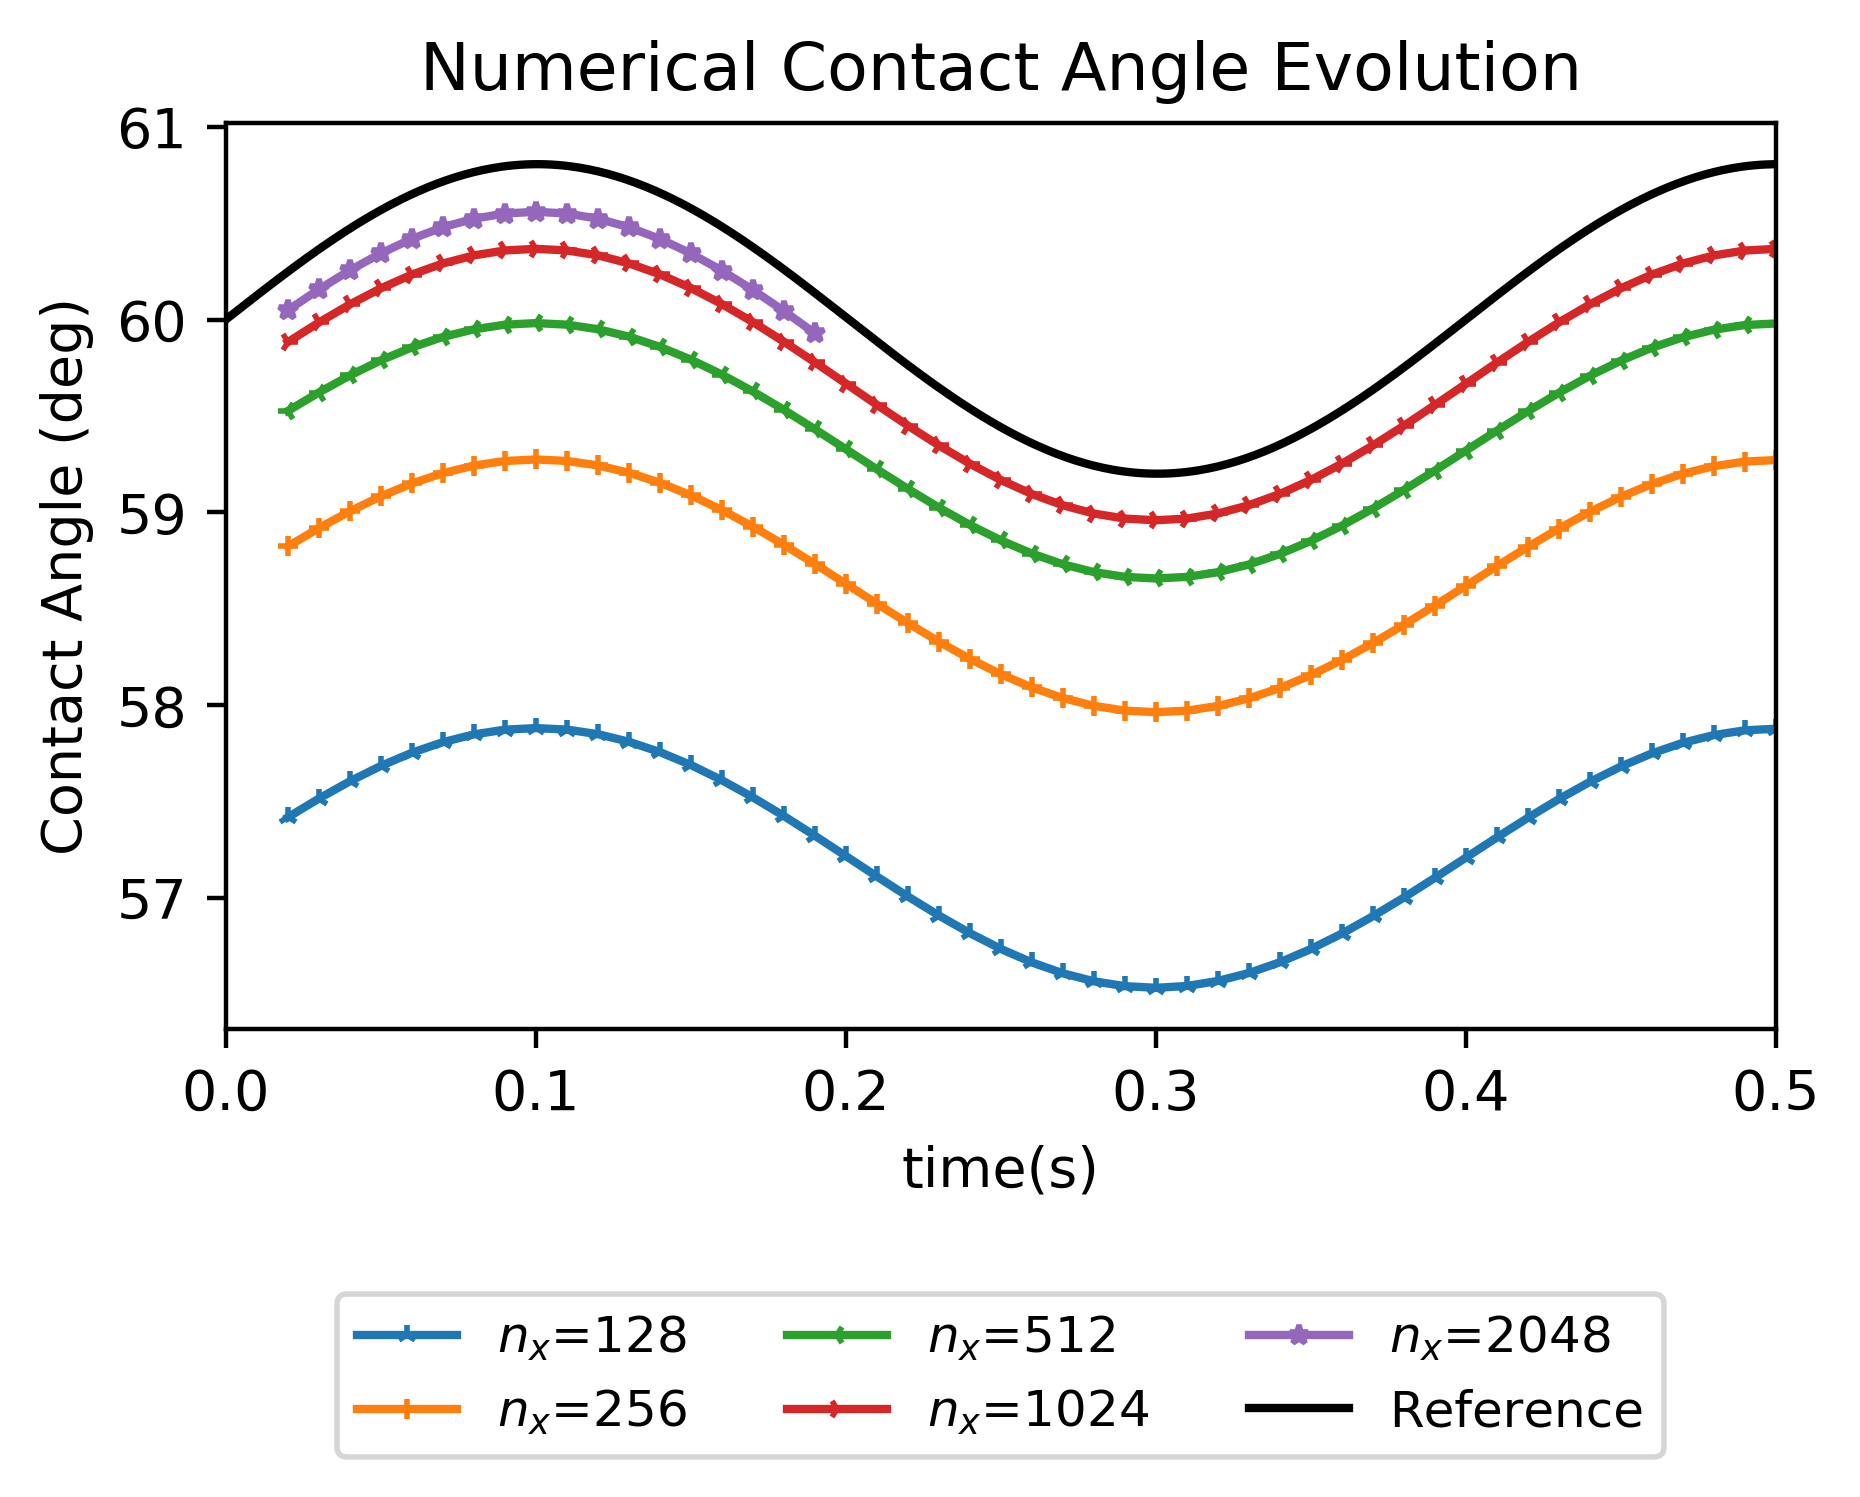

[2.8665873674607667, 1.4332936837303833, 0.7166468418651917, 0.35832342093259584, 0.17916171046629792]
[2.86658737 1.47199466 0.76544342 0.38541357 0.20335966]
[0.0390625, 0.01953125, 0.009765625, 0.0048828125, 0.00244140625]


<Figure size 2400x1600 with 0 Axes>

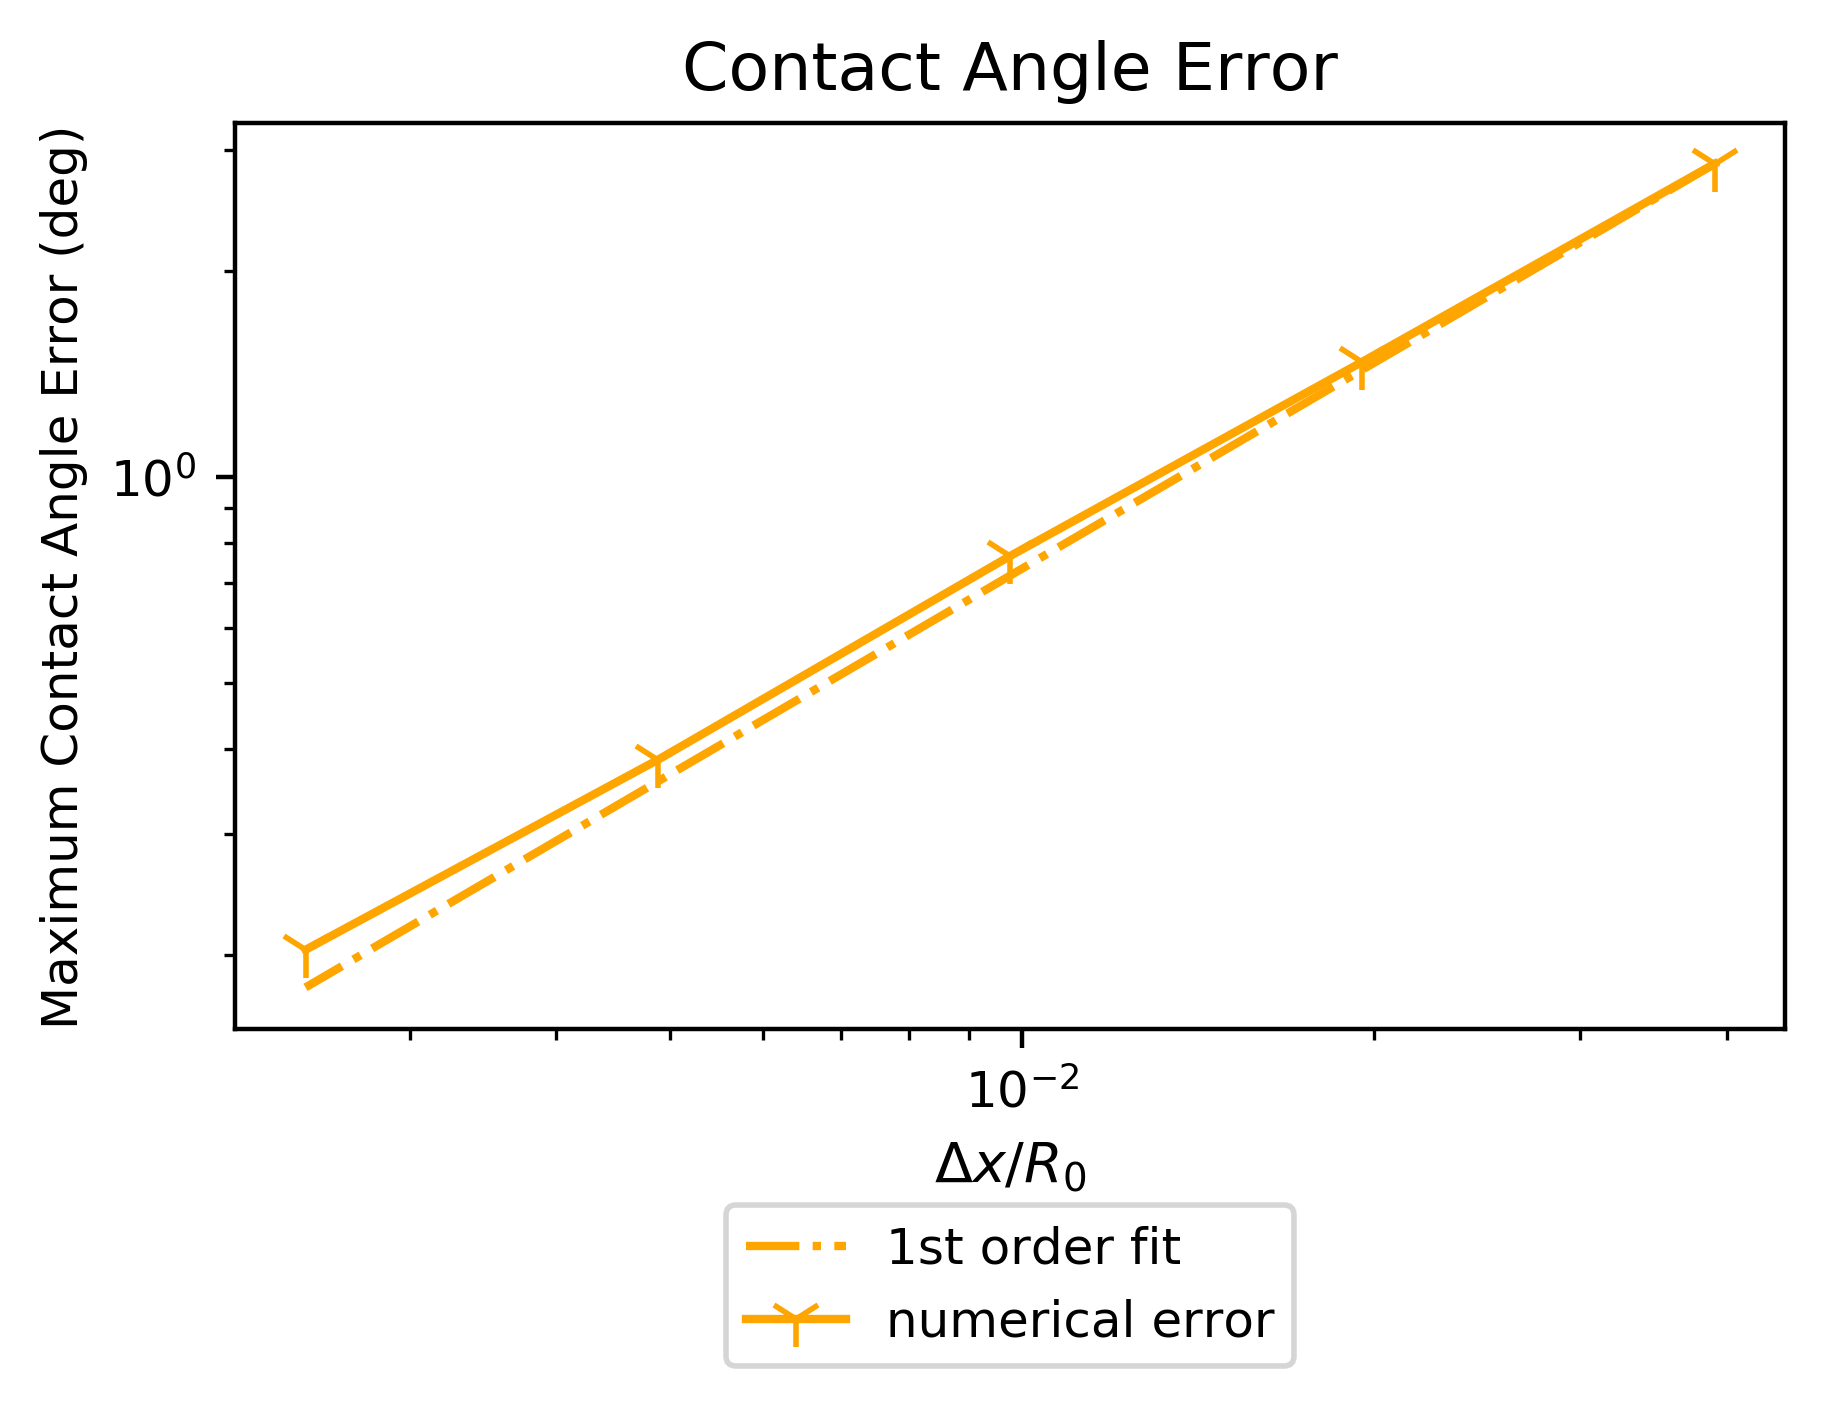

In [12]:
#Loading the necessary files
import pandas as pd
import numpy as np
from vtk import vtkStructuredPointsReader
from vtk.util import numpy_support as VN
import csv
# for radians
import math
import os
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
#rcParams["figure.dpi"] = 600
import itertools
import matplotlib.ticker as mtick
##############################################################################################################
#File structure
pattern = "test"
dataFolder = "/postProcessing/"
dataFile = "contactangleMax.csv"
cwd = os.getcwd()
casefolders = [cwd + "/" + folder for folder in os.listdir(cwd) if pattern in folder]
#print(casefolders)
    
datafolders = [df+dataFolder for df in casefolders]
datafolders.sort()
fileNames = [fN+dataFile for fN in datafolders]
print(fileNames)



# pattern = "advectionTest"
# root_folder = "advection-Test"
# sub_root_folder = "uniformMesh"
# dataFolder = "/postProcessing/"
# contactAngleFile = "contactangleMax.csv"

# testfolder = [root_folder+"/"+ folder for folder in os.listdir(root_folder) if sub_root_folder in folder]
# #print(testfolder)
# #print(os.listdir(sub_root_folder))
# casefolders = [testfolder[0]+"/"+ folder for folder in os.listdir(testfolder[0]) if pattern in folder]
# #print(casefolders)
# datafolders = [df+dataFolder for df in casefolders]
# datafolders.sort()
# fileNames = [fN+contactAngleFile for fN in datafolders]
# print(fileNames)
# fileNames.pop()
#fileNames.append("/work/scratch/ma11kuba/projects/testCases/advection-Test/uniformMesh/test/postProcessing/contactangleMax.csv")

# #contact angle evolution plot and error  calculation
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
# fig.suptitle('Numerical contact angle evolution using plicRDF reconstruction scheme', fontsize='7')

# #ax=plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
# #fig.subplots_adjust(hspace=0.4, wspace=0.4)
# #ax = fig.add_subplot(2, 1, 1)
# #myaxes = fig.add_axes([0.1, 0.1, 0.5, 0.5])
marker = itertools.cycle(('2', '+', '3', '4', '*')) 
# error_inf = np.array([]) #to store max error

# for idx, val in enumerate(fileNames):
#     t_sim = np.array([])
#     ca_sim = np.array([])
    
#     df = pd.read_csv(val, index_col = 0)
#     ax.plot(df, label =labels[idx], marker=next(marker), markersize=2)
    
#     readfile = open(fileNames[idx], "r")
#     for line in readfile:
#         t_sim = np.append(t_sim, float(line.split(",")[0]))
#         ca_sim = np.append(ca_sim, float(line.split(",")[1]))

#     ca_ref = get_ref_contact_angle(t_sim) #Reference contact angles against simulation time for error calculation
#     error_inf =np.append( error_inf, cal_max_error(ca_sim, ca_ref))

# ##Refernce solution plot
# t = np.arange(0, 0.5 + 0.001, 0.001) # Numerical grid for reference solution
# contact_angle = get_ref_contact_angle(t)
# #print(contact_angle)
# ax1.plot(t, contact_angle, label='Reference', color='black', markersize=10)
# ####

# #ax1.title.set_text("Numerical Contact Angle Evolution")
# ax1.set(xlabel='time(s)', ylabel='Contact Angle (deg)')
# ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=3) 
# ax1.xaxis.get_label().set_fontsize(6)
# ax1.yaxis.get_label().set_fontsize(5)
# plt.show
# ######
# #plt.savefig("BlockMesh_CAE_C0_001.pdf")

# R0 = 0.001 #1mm initial radius
# x_axis_for_error_plot = [(1/R0/nx) for nx in nX]
# print(x_axis_for_error_plot)
# #ax1 = fig.add_subplot(2, 1,2)
# #ax1=plt.subplot2grid((3, 3), (2, 0), colspan=2, rowspan=2)
# ax2.plot(x_axis_for_error_plot,error_inf , label='error', color='orange', markersize=10)
# #ax.title.set_text("Contact Angle Error")
# ax2.set(xlabel=r'$\Delta x / R_0$', ylabel='Maximum Contact Angle Error (deg)')
# ax2.xaxis.get_label().set_fontsize(6)
# ax2.yaxis.get_label().set_fontsize(5)
# #fig.tight_layout()

nX = np.array([128, 256, 512, 1024, 2048])
labelstr = r"$n_x$"
labels = [labelstr+ "="+str(nx) for nx in nX]

fig = plt.figure()
#myaxes = fig.add_axes([0.1, 0.1, 0.5, 0.5])
plt.figure(figsize=(5, 3))
rcParams["figure.dpi"] = 400
plt.rcParams['savefig.dpi'] = 400
error_inf = np.array([]) #to store max error

for idx, val in enumerate(fileNames):
    t_sim = np.array([])
    ca_sim = np.array([])
    
    df = pd.read_csv(val, index_col = 0)
    plt.plot(df, label =labels[idx], marker=next(marker), markersize=3.5)
    
    readfile = open(fileNames[idx], "r")
    for line in readfile:
        t_sim = np.append(t_sim, float(line.split(",")[0]))
        ca_sim = np.append(ca_sim, float(line.split(",")[1]))

    ca_ref = get_ref_contact_angle(t_sim) #Reference contact angles against simulation time for error calculation
    #print("HI")
    error_inf =np.append( error_inf, cal_max_error(ca_sim, ca_ref))

##Refernce solution plot
t = np.arange(0, 0.5 + 0.001, 0.001) # Numerical grid for reference solution
contact_angle = get_ref_contact_angle(t)
#print(contact_angle)

plt.title(r'Numerical Contact Angle Evolution', fontsize=12)
plt.xlabel(r"time(s)" ,fontsize=10)
plt.ylabel(r"Contact Angle (deg)",fontsize=10)
plt.xticks(color='black',size = 10)
plt.yticks(color='black',size = 10)
plt.xlim([0, 0.5])
plt.plot(t, contact_angle, label=r'Reference', color='black', markersize=10)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=3, fontsize=9)
plt.savefig('contact-angle-evolution-uniform-mesh1'+'.png', bbox_inches='tight')

plt.show()

    
###############################################################################################################



fig1 =plt.figure()
#myaxes = fig.add_axes([0.1, 0.1, 0.5, 0.5])
plt.figure(figsize=(5, 3))
rcParams["figure.dpi"] = 400
plt.rcParams['savefig.dpi'] = 400
R0 = 0.2 #1mm initial radius
x_axis_for_error_plot = [(1/R0/nx) for nx in nX]

y_ref_for_error_plot = [error_inf[0]]
for idx in range(1, len(nX)):
    y_ref_for_error_plot.insert(idx, y_ref_for_error_plot[idx-1]*x_axis_for_error_plot[idx]/x_axis_for_error_plot[idx-1])
print(y_ref_for_error_plot)
print(error_inf)
print(x_axis_for_error_plot)
plt.plot(x_axis_for_error_plot,y_ref_for_error_plot , label="1st order fit", linestyle ='dashdot',color='orange', markersize=10)
plt.plot(x_axis_for_error_plot,error_inf , label = "numerical error", color='orange', marker='1', markersize=10)
plt.title(r'Contact Angle Error', fontsize=12)
plt.xlabel(r'$\Delta x / R_0$' ,color='black',fontsize=10)
plt.ylabel(r'Maximum Contact Angle Error (deg)',color='black',fontsize=9)
#plt.ylim([0, 3])
plt.xticks(color='black',size = 9)
plt.yticks(color='black',size = 9)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=1, fontsize=9)
plt.loglog()
plt.savefig('error-in-contact-angle-evolution-uniform-mesh1'+'.png', bbox_inches='tight')

#plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
plt.show()